In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
X_test.shape

(10000, 32, 32, 3)

In [6]:
y_test.shape

(10000, 1)

In [7]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [8]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [9]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [10]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [11]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [12]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

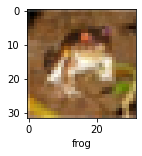

In [13]:
plot_sample(X_train, y_train, 0)

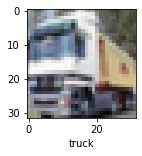

In [14]:
plot_sample(X_train, y_train, 1)

In [15]:
X_train.shape

(50000, 32, 32, 3)

In [16]:
X_train = X_train / 255.0
X_test = X_test / 255.0

### Build simple artificial neural network for image classification

In [17]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 55s 35ms/step - loss: 1.8127 - accuracy: 0.3547
Epoch 2/5
1563/1563 [==============================] - 56s 36ms/step - loss: 1.6214 - accuracy: 0.4262
Epoch 3/5
1563/1563 [==============================] - 52s 34ms/step - loss: 1.5412 - accuracy: 0.4584
Epoch 4/5
1563/1563 [==============================] - 53s 34ms/step - loss: 1.4798 - accuracy: 0.4783
Epoch 5/5
1563/1563 [==============================] - 55s 35ms/step - loss: 1.4308 - accuracy: 0.4957


You can see that at the end of 5 epochs, accuracy is at around 49%

In [18]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.53      0.54      0.53      1000
           1       0.68      0.41      0.51      1000
           2       0.38      0.36      0.37      1000
           3       0.39      0.30      0.34      1000
           4       0.35      0.54      0.42      1000
           5       0.43      0.33      0.37      1000
           6       0.63      0.33      0.43      1000
           7       0.57      0.53      0.55      1000
           8       0.62      0.52      0.57      1000
           9       0.38      0.79      0.51      1000

    accuracy                           0.46     10000
   macro avg       0.50      0.46      0.46     10000
weighted avg       0.50      0.46      0.46     10000

